In [48]:
# Modelo solo para casos con diabetes. Se recortaron casos Moderate y se unificaron los casos Severe y ProliferativeDR para que el dataset quede 
# más balanceados. Se tomaron imágenes a color de 224x224.

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
!pip install unrar

In [3]:
import os
os.makedirs('data', exist_ok=True)

In [ ]:
# En tu Drive de Google tenés que crear la siguiente estructura de carpetas /IADesafio02/data/comprimidos/ y subir el rar que podés descargar desde:
# https://drive.google.com/file/d/1StJRMCqOZEFPCqq1paBiNRxBlWRxvBk8/view?usp=sharing

In [102]:
!unrar x '/content/drive/My Drive/IADesafio02/data/comprimidos/images_binario_224.rar' './data'

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Extracting  ./data/images_binario_224/40619_right.jpeg                    72%  OK 
Extracting  ./data/images_binario_224/40622_left.jpeg                     72%  OK 
Extracting  ./data/images_binario_224/40622_right.jpeg                    72%  OK 
Extracting  ./data/images_binario_224/40624_left.jpeg                     72%  OK 
Extracting  ./data/images_binario_224/40624_right.jpeg                    72%  OK 
Extracting  ./data/images_binario_224/40630_left.jpeg                     72%  OK 
Extracting  ./data/images_binario_224/40630_right.jpeg                    72%  OK 
Extracting  ./data/images_binario_224/40631_left.jpeg                     72%  OK 
Extracting  ./data/images_binario_224/40631_right.jpeg                    72%  OK 
Extracting  ./data/images_binario_224/40638_left.jpeg                     72%  OK 
Extracting  .

In [ ]:
# En tu Drive de Google tenés que crear la siguiente estructura de carpetas /IADesafio02/data y subir el siguiente CSV: 
# https://drive.google.com/file/d/1KLGEbVkNMAX4l_05c_6FwYEGN5_TlOgr/view?usp=sharing

In [103]:
data_dir = './data/images_binario_224'
drive_dir = '/content/drive/My Drive/IADesafio02/data'

In [52]:
res_x = 224
res_y = 224

In [53]:
import os, shutil
import pandas as pd

In [74]:
df = pd.read_csv(drive_dir + '/images_binario_224.csv')
df = df[df['level'] != 0].copy(deep=True) # Se eliminan los casos sin Diabetes

In [75]:
# Obtengo los casos Moderate con imágenes de mayor resolución. Misma cantidad de casos Mild. 
df_moderate = df[df['level'] == 2].sort_values(by='ancho', ascending=False).head(df[df['level'] == 1].shape[0]).copy(deep=True)

In [76]:
# Elimino todos los Moderate porque en la siguiente celda hago un concat de df_moderate con el resto de los casos
df = df[df['level'] != 2].copy(deep=True)

In [77]:
df = pd.concat([df, df_moderate], axis=0).copy(deep=True)

In [78]:
clases = {1: 'Mild', 2: 'Moderate', 3: 'SevereAndProliferativeDR'}

df['clase'] = ''
df.loc[df['level'] == 1, 'clase'] = 'Mild'
df.loc[df['level'] == 2, 'clase'] = 'Moderate'
df.loc[df['level'] == 3, 'clase'] = 'SevereAndProliferativeDR'
df.loc[df['level'] == 4, 'clase'] = 'SevereAndProliferativeDR'

In [79]:
df['level'].value_counts()

2    2443
1    2443
3     873
4     708
Name: level, dtype: int64

In [80]:
df['clase'].value_counts()

Mild                        2443
Moderate                    2443
SevereAndProliferativeDR    1581
Name: clase, dtype: int64

In [81]:
df['image'] = df['image'] + '.jpeg'

In [82]:
df['image']

8        10017_left.jpeg
9       10017_right.jpeg
10        1002_left.jpeg
14       10030_left.jpeg
15      10030_right.jpeg
              ...       
3769     19612_left.jpeg
3770    19612_right.jpeg
3771     19614_left.jpeg
3772    19614_right.jpeg
3778    19628_right.jpeg
Name: image, Length: 6467, dtype: object

In [83]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(df, stratify=df['clase'], test_size=0.2, random_state=42)

In [84]:
test, val = train_test_split(train, stratify=train['clase'], test_size=0.5, random_state=42)

In [85]:
train['clase'].value_counts()

Mild                        1954
Moderate                    1954
SevereAndProliferativeDR    1265
Name: clase, dtype: int64

In [86]:
val['clase'].value_counts()

Mild                        977
Moderate                    977
SevereAndProliferativeDR    633
Name: clase, dtype: int64

In [87]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [128]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.utils import plot_model
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 43264)           

In [129]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train, # Referimos el df de train
    directory=data_dir, # El directorio donde se encuentran las imágenes
    x_col='image', # La columna con los path de los archivos
    y_col='clase', # La variable con las labels
    target_size=(res_x, res_y),
    classes=None, # Las clases se obtienen a partir de y_col
    class_mode='categorical', # Se trata de un problema multi-class, multi-label
    batch_size=150
   )

validation_generator = val_datagen.flow_from_dataframe(
    val, # Referimos el df de validación
    directory=data_dir, # El directorio donde se encuentran las imágenes
    x_col='image', # La columna con los path de los archivos
    y_col='clase', # La variable con las labels
    target_size=(res_x, res_y),
    classes=None, # Las clases se obtienen a partir de y_col
    class_mode='categorical', # Se trata de un problema multi-class, multi-label
    batch_size=150,
    shuffle=False
   )

Found 5173 validated image filenames belonging to 3 classes.
Found 2587 validated image filenames belonging to 3 classes.


In [130]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adagrad(
                learning_rate=0.001,
                initial_accumulator_value=0.1,
                epsilon=1e-07),
              metrics=['acc'])

In [131]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

#early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=3, verbose=1)

callbacks_list = [reduce_lr]

In [133]:
history = model.fit(
      train_generator,
      steps_per_epoch=5,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=1) #,
      #callbacks=callbacks_list)

Epoch 1/30
5/5 [==============================] - 45s 9s/step - loss: 1.0830 - acc: 0.4573 - val_loss: 1.0756 - val_acc: 0.4907
Epoch 2/30
5/5 [==============================] - 45s 9s/step - loss: 1.0814 - acc: 0.4520 - val_loss: 1.0756 - val_acc: 0.4907
Epoch 3/30
5/5 [==============================] - 45s 9s/step - loss: 1.0748 - acc: 0.5040 - val_loss: 1.0755 - val_acc: 0.4907
Epoch 4/30
5/5 [==============================] - 41s 8s/step - loss: 1.0769 - acc: 0.4829 - val_loss: 1.0755 - val_acc: 0.4907
Epoch 5/30
5/5 [==============================] - 45s 9s/step - loss: 1.0779 - acc: 0.4800 - val_loss: 1.0755 - val_acc: 0.4920
Epoch 6/30
5/5 [==============================] - 45s 9s/step - loss: 1.0805 - acc: 0.4720 - val_loss: 1.0755 - val_acc: 0.4920
Epoch 7/30
5/5 [==============================] - 45s 9s/step - loss: 1.0804 - acc: 0.4693 - val_loss: 1.0754 - val_acc: 0.4920
Epoch 8/30
5/5 [==============================] - 45s 9s/step - loss: 1.0814 - acc: 0.4560 - val_loss: 1

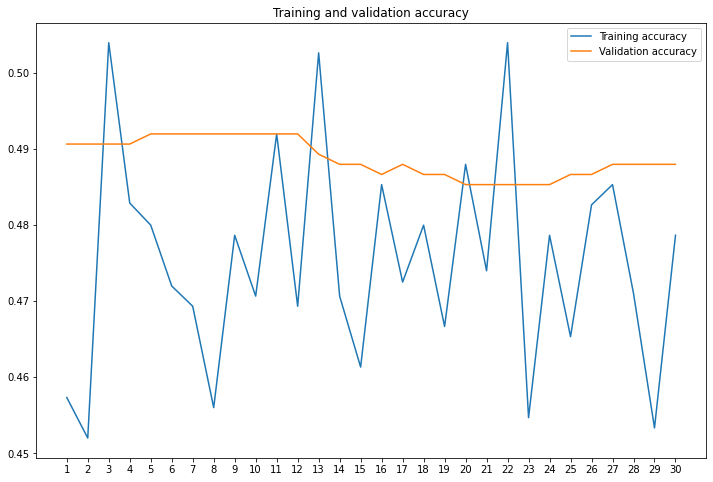

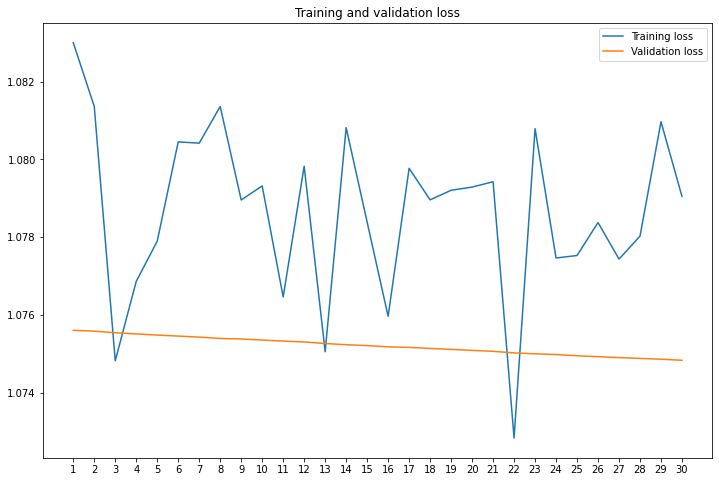

In [134]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,8))
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.xticks(ticks=epochs)
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(12,8))
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.xticks(ticks=epochs)
plt.title('Training and validation loss')
plt.legend()
plt.show()

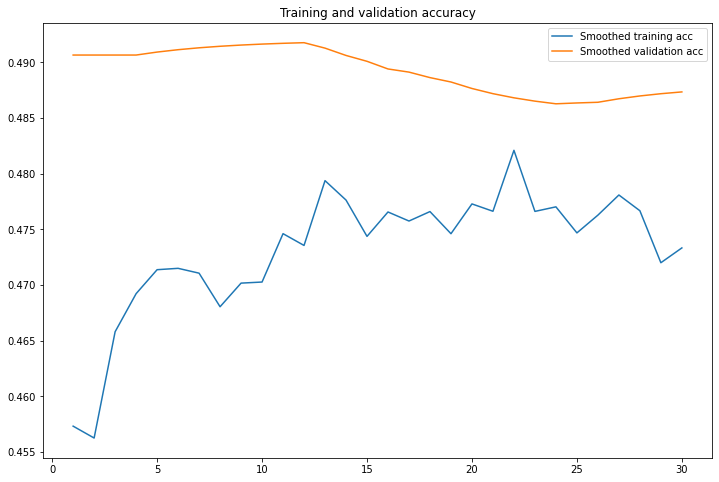

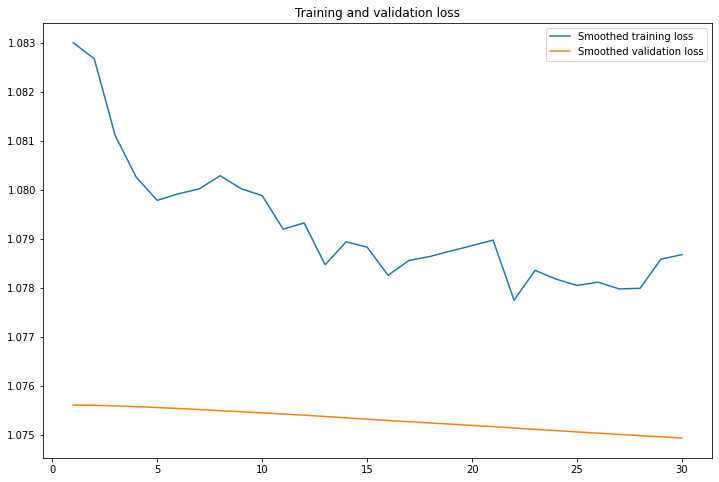

In [135]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.figure(figsize=(12,8))
plt.plot(epochs, smooth_curve(acc), label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(12,8))
plt.plot(epochs, smooth_curve(loss), label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [136]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = train_datagen.flow_from_dataframe(
    test, # Referimos el df de train
    directory=data_dir, # El directorio donde se encuentran las imágenes
    x_col='image', # La columna con los path de los archivos
    y_col='clase', # La variable con las labels
    target_size=(res_x, res_y),
    classes=None, # Las clases se obtienen a partir de y_col
    class_mode='categorical', # Se trata de un problema multi-class, multi-label
    batch_size=20
   )

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('Accuracy en test:', test_acc)
print('Loss en test:', test_loss)

Found 2586 validated image filenames belonging to 3 classes.
Accuracy en test: 0.4869999885559082
Loss en test: 1.0786974430084229
